In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

In [2]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


<AxesSubplot: >

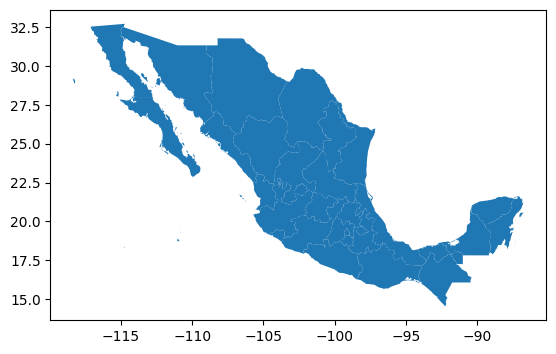

In [3]:
#plt.grid()
geo_df.plot()

In [4]:
data_path = os.getcwd()+ '/Data/Temp/2018/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['201801010000TMed.csv', '201802010000TMed.csv', '201803010000TMed.csv', '201804010000TMed.csv', '201805010000TMed.csv', '201806010000TMed.csv', '201807010000TMed.csv', '201809010000TMed.csv', '201810010000TMed.csv', '201811010000TMed.csv', '201812010000TMed.csv']


In [5]:
path = os.getcwd()+ '/Data/Temp/2018/'
all_files = glob.glob(path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201801010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201802010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201803010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201804010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201805010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201806010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201807010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201809010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201810010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201811010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2018\\201812010000TMed.csv']

In [6]:
#dfPrueba=[df1,df2]
li = []
TMed = ['TMed201801','TMed201802','TMed201803','TMed201804','TMed201805','TMed201806','TMed201807','TMed201809',
        'TMed201810','TMed201811','TMed201812' ]

In [7]:
for i in range(len(TMed)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df = df.rename(columns={'Tmed':TMed[i]})
    li.append(df)
    
li[0].head()

,Lon,Lat,Clave,Edo,Est,TMed201801
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,15.0
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,16.7
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,12.3
4,-92.80,16.55,ACACP,CHIS,ACALA,21.2


In [8]:
d1=li[0]
d2=li[1]
d3=li[2]
d4=li[3]
d5=li[4]
d6=li[5]
d7=li[6]
#d8=li[7]
d9=li[7]
d10=li[8]
d11=li[9]
d12=li[10]
#len(d1),len(d2)

In [11]:
df_outer = pd.merge(d1,d2,
              on=['Clave','Lon','Lat','Est','Edo'], how='outer')

df_outer = pd.merge(df_outer , d3, on=['Clave','Lon','Lat','Est','Edo'], how='outer')

#pd.concat(li,axis=0,ignore_index=True)
df_outer.head()

,Lon,Lat,Clave,Edo,Est,TMed201801,TMed201802,TMed201803
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2,19.8,23.5
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,15.0,22.8,24.1
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,16.7,16.6,16.4
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,12.3,15.9,17.8
4,-92.80,16.55,ACACP,CHIS,ACALA,21.2,25.7,27.8


In [12]:
from functools import reduce
dfl=[d1,d2,d3,d4,d5,d6,d7,d9,d10,d11,d12]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Clave','Lon','Lat','Est','Edo'],
                                            how='outer'), dfl)

df_merged

,Lon,Lat,Clave,Edo,Est,TMed201801,TMed201802,TMed201803,TMed201804,TMed201805,TMed201806,TMed201807,TMed201809,TMed201810,TMed201811,TMed201812
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2,19.8,23.5,23.9,25.4,23.2,NaN,NaN,NaN,NaN,NaN
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,15.0,22.8,24.1,24.6,28.4,29.5,NaN,NaN,NaN,NaN,NaN
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,16.7,16.6,16.4,18.9,18.8,21.1,NaN,NaN,NaN,NaN,NaN
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,12.3,15.9,17.8,17.6,18.6,17.9,NaN,NaN,NaN,NaN,NaN
4,-92.80,16.55,ACACP,CHIS,ACALA,21.2,25.7,27.8,28.9,29.1,27.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,-93.38,18.00,CARTB,TAB,Cárdenas Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.142857
2428,-93.28,18.00,SAMTB,TAB,Samaria Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.067308
2429,-98.25,19.32,OBSTL,TLAX,Observatorio de Tlaxcala Tlax.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.810870
2430,-102.13,18.85,LPNMC,MICH,Los Panches Mich.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750000


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 0 to 2431
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lon         2366 non-null   float64
 1   Lat         2366 non-null   float64
 2   Clave       2366 non-null   object 
 3   Edo         2366 non-null   object 
 4   Est         2365 non-null   object 
 5   TMed201801  1099 non-null   float64
 6   TMed201802  1069 non-null   float64
 7   TMed201803  1088 non-null   float64
 8   TMed201804  1086 non-null   float64
 9   TMed201805  1068 non-null   float64
 10  TMed201806  1124 non-null   float64
 11  TMed201807  1082 non-null   float64
 12  TMed201809  1151 non-null   float64
 13  TMed201810  1085 non-null   float64
 14  TMed201811  1093 non-null   float64
 15  TMed201812  893 non-null    float64
dtypes: float64(13), object(3)
memory usage: 323.0+ KB


In [14]:
cols = ["TMed201801","TMed201802","TMed201803","TMed201804","TMed201805","TMed201806","TMed201807",
       "TMed201809","TMed201810","TMed201811","TMed201812"]
df_merged['TMed'] = df_merged[cols].mean(axis=1)
df_merged

,Lon,Lat,Clave,Edo,Est,TMed201801,TMed201802,TMed201803,TMed201804,TMed201805,TMed201806,TMed201807,TMed201809,TMed201810,TMed201811,TMed201812,TMed
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2,19.8,23.5,23.9,25.4,23.2,NaN,NaN,NaN,NaN,NaN,22.000000
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,15.0,22.8,24.1,24.6,28.4,29.5,NaN,NaN,NaN,NaN,NaN,24.066667
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,16.7,16.6,16.4,18.9,18.8,21.1,NaN,NaN,NaN,NaN,NaN,18.083333
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,12.3,15.9,17.8,17.6,18.6,17.9,NaN,NaN,NaN,NaN,NaN,16.683333
4,-92.80,16.55,ACACP,CHIS,ACALA,21.2,25.7,27.8,28.9,29.1,27.9,NaN,NaN,NaN,NaN,NaN,26.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,-93.38,18.00,CARTB,TAB,Cárdenas Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.142857,24.142857
2428,-93.28,18.00,SAMTB,TAB,Samaria Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.067308,24.067308
2429,-98.25,19.32,OBSTL,TLAX,Observatorio de Tlaxcala Tlax.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.810870,13.810870
2430,-102.13,18.85,LPNMC,MICH,Los Panches Mich.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750000,24.750000


In [15]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Lon, df_merged.Lat), crs="EPSG:4326")
geo_df1

,Lon,Lat,Clave,Edo,Est,TMed201801,TMed201802,TMed201803,TMed201804,TMed201805,TMed201806,TMed201807,TMed201809,TMed201810,TMed201811,TMed201812,TMed,geometry
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2,19.8,23.5,23.9,25.4,23.2,NaN,NaN,NaN,NaN,NaN,22.000000,POINT (-101.51000 20.43000)
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,15.0,22.8,24.1,24.6,28.4,29.5,NaN,NaN,NaN,NaN,NaN,24.066667,POINT (-98.38000 24.06000)
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,16.7,16.6,16.4,18.9,18.8,21.1,NaN,NaN,NaN,NaN,NaN,18.083333,POINT (-116.90000 32.44000)
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,12.3,15.9,17.8,17.6,18.6,17.9,NaN,NaN,NaN,NaN,NaN,16.683333,POINT (-97.97000 20.17000)
4,-92.80,16.55,ACACP,CHIS,ACALA,21.2,25.7,27.8,28.9,29.1,27.9,NaN,NaN,NaN,NaN,NaN,26.766667,POINT (-92.80000 16.55000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,-93.38,18.00,CARTB,TAB,Cárdenas Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.142857,24.142857,POINT (-93.38000 18.00000)
2428,-93.28,18.00,SAMTB,TAB,Samaria Tab.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.067308,24.067308,POINT (-93.28000 18.00000)
2429,-98.25,19.32,OBSTL,TLAX,Observatorio de Tlaxcala Tlax.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.810870,13.810870,POINT (-98.25000 19.32000)
2430,-102.13,18.85,LPNMC,MICH,Los Panches Mich.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.750000,24.750000,POINT (-102.13000 18.85000)


In [16]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')
intersect

,Lon,Lat,Clave,Edo,Est,TMed201801,TMed201802,TMed201803,TMed201804,TMed201805,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,16.2,19.8,23.5,23.9,25.4,...,11,Guanajuato,Guanajuato,25.1,12.72,32.01,54.53,65.67,0.74,POINT (-101.51000 20.43000)
1,-100.71,20.03,ACNGJ,GTO,ACAMBARO,15.0,18.2,21.4,22.3,23.2,...,11,Guanajuato,Guanajuato,25.1,12.72,32.01,54.53,65.67,0.74,POINT (-100.71000 20.03000)
2,-101.62,20.49,ATBGJ,GTO,AGUA TIBIA,13.5,17.3,20.1,21.1,22.8,...,11,Guanajuato,Guanajuato,25.1,12.72,32.01,54.53,65.67,0.74,POINT (-101.62000 20.49000)
3,-100.90,20.95,CSRGJ,GTO,CINCO SEÑORES,11.3,16.4,18.7,19.8,21.2,...,11,Guanajuato,Guanajuato,25.1,12.72,32.01,54.53,65.67,0.74,POINT (-100.90000 20.95000)
4,-100.95,20.48,CRTGJ,GTO,CORTAZAR,15.1,18.4,21.5,22.6,24.6,...,11,Guanajuato,Guanajuato,25.1,12.72,32.01,54.53,65.67,0.74,POINT (-100.95000 20.48000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,-100.44,20.60,CARQT,QRO,Carrillo Qro.,NaN,NaN,NaN,NaN,NaN,...,22,Querétaro,Querétaro,23.6,7.49,31.74,59.72,95.07,1.05,POINT (-100.44000 20.60000)
2325,-100.45,20.70,JRQQT,QRO,Juriquilla Qro.,NaN,NaN,NaN,NaN,NaN,...,22,Querétaro,Querétaro,23.6,7.49,31.74,59.72,95.07,1.05,POINT (-100.45000 20.70000)
2326,-99.82,21.06,PMLQT,QRO,Peñamiller Qro.,NaN,NaN,NaN,NaN,NaN,...,22,Querétaro,Querétaro,23.6,7.49,31.74,59.72,95.07,1.05,POINT (-99.82000 21.06000)
2327,-99.48,21.23,JLPQT,QRO,Jalpan Qro.,NaN,NaN,NaN,NaN,NaN,...,22,Querétaro,Querétaro,23.6,7.49,31.74,59.72,95.07,1.05,POINT (-99.48000 21.23000)


In [17]:
grouped = intersect.groupby(['id','state'])['TMed'].agg('mean')
grouped.head()

id  state              
1   Aguascalientes         17.648545
2   Baja California        20.040606
3   Baja California Sur    23.225292
4   Campeche               27.005165
5   Chiapas                24.989096
Name: TMed, dtype: float64

In [25]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'TMed': 'TMed18'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,TMed18
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",17.648545
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",20.040606
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",23.225292
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",27.005165
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",24.989096


In [22]:
merge['TMed18'].max()

27.38973853526859

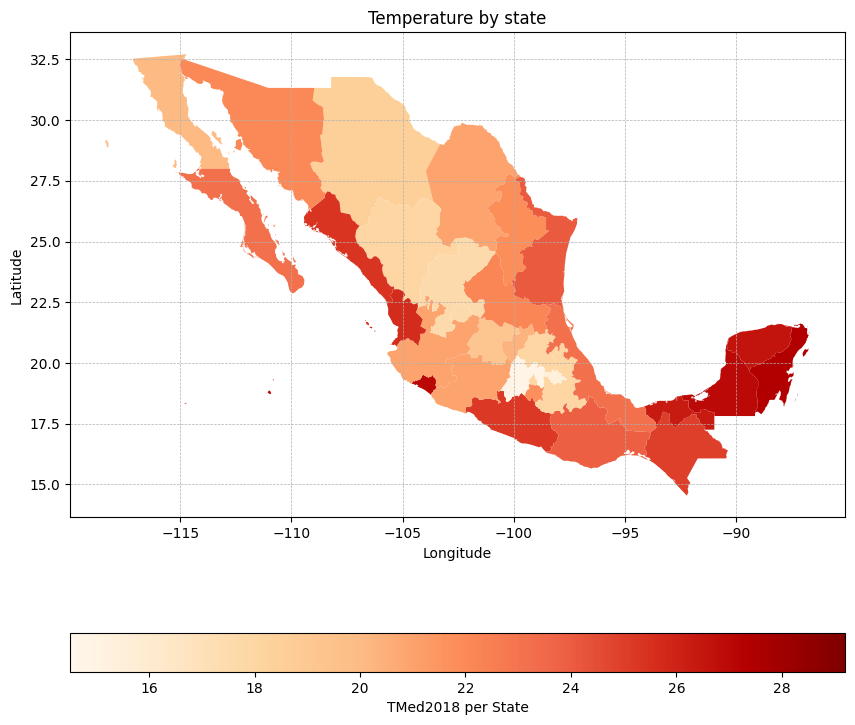

In [24]:
import matplotlib.pyplot as plt

merge.plot(column='TMed18', figsize=(10,10),
           legend_kwds={'label': "TMed2018 per State", 'orientation': "horizontal"}, legend=True, cmap='OrRd',vmin=14.5, vmax=29.2)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Temperature by state")
plt.savefig("TMed2018")


# Analisis por mes

Agrupar la tabla merge con los meses e identificador por estado

In [26]:
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
grouped2.head()

,,TMed201801,TMed201802,TMed201803,TMed201804,TMed201805,TMed201806,TMed201807,TMed201809,TMed201810,TMed201811,TMed201812
id,state,,,,,,,,,,,
1,Aguascalientes,12.909091,16.764706,18.600000,19.892000,21.870833,21.247826,20.512500,19.626087,18.566667,14.667176,12.937724
2,Baja California,16.213333,15.575000,16.607692,20.146154,20.216667,23.425000,28.638462,26.633333,21.288235,16.812170,13.808231
3,Baja California Sur,19.609091,19.666667,20.485000,22.685000,24.520000,26.871429,29.519048,29.019048,25.338095,21.924871,19.116864
4,Campeche,22.276471,26.136842,27.545000,28.515000,28.788235,28.830000,28.811111,28.380000,27.372222,25.960786,24.238720
5,Chiapas,21.614286,24.662745,26.138462,26.407547,26.935294,25.989474,26.057143,25.733846,25.239683,24.470792,22.706826


In [27]:
dfAñoMes2018 = pd.merge(merge, grouped2, on="id")
dfAñoMes2018

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,TMed201802,TMed201803,TMed201804,TMed201805,TMed201806,TMed201807,TMed201809,TMed201810,TMed201811,TMed201812
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,16.764706,18.600000,19.892000,21.870833,21.247826,20.512500,19.626087,18.566667,14.667176,12.937724
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,15.575000,16.607692,20.146154,20.216667,23.425000,28.638462,26.633333,21.288235,16.812170,13.808231
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,19.666667,20.485000,22.685000,24.520000,26.871429,29.519048,29.019048,25.338095,21.924871,19.116864
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,26.136842,27.545000,28.515000,28.788235,28.830000,28.811111,28.380000,27.372222,25.960786,24.238720
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,24.662745,26.138462,26.407547,26.935294,25.989474,26.057143,25.733846,25.239683,24.470792,22.706826
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,14.802564,16.821429,20.452381,24.582051,26.884314,25.250000,22.350000,18.774419,13.308221,11.176877
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,17.789286,20.468966,22.051724,27.259259,29.151724,28.663333,24.625806,21.503226,15.507369,13.576102
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,26.200000,25.933333,25.913333,28.660000,28.385714,29.440000,28.206667,27.785714,26.407704,25.580485
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,16.862963,19.065217,19.082353,20.147826,19.537500,18.815000,18.735294,18.044444,16.051400,15.135652
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,16.031915,18.904444,20.493478,23.442553,24.539583,23.520000,20.796078,18.585417,13.963325,11.768703


In [28]:
dfAñoMes2018.to_csv('TempMexAñoMes2018.csv',index=False)